c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:57:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Số mẫu GAN vùng boundary: 2100
Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:58:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Fitting 3 folds for each of 64 candidates, totalling 192 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Dell\App

[LightGBM] [Info] Number of positive: 16609, number of negative: 33793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 50402, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329531 -> initscore=-0.710309
[LightGBM] [Info] Start training from score -0.710309
Best LightGBM params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'subsample': 0.8}


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [00:01:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



== XGBoost (tuned) (Train: Real+GAN boundary, Test: Real) ==
Best threshold: 0.35 - Macro F1: 0.7922
              precision    recall  f1-score   support

           0     0.8738    0.8779    0.8759     33793
           1     0.7125    0.7047    0.7086     14509

    accuracy                         0.8259     48302
   macro avg     0.7932    0.7913    0.7922     48302
weighted avg     0.8254    0.8259    0.8256     48302

Confusion matrix:
 [[29667  4126]
 [ 4284 10225]]
Accuracy: 0.8258871268270465
=> Đã lưu classification report vào: D:/dow/project/evaluation/pipline/xgb_final_report.csv
=> Đã lưu confusion matrix vào: D:/dow/project/evaluation/pipline/xgb_final_cm.csv
=> Đã lưu model vào: D:/dow/project/evaluation/pipline/xgb_final_model.pkl


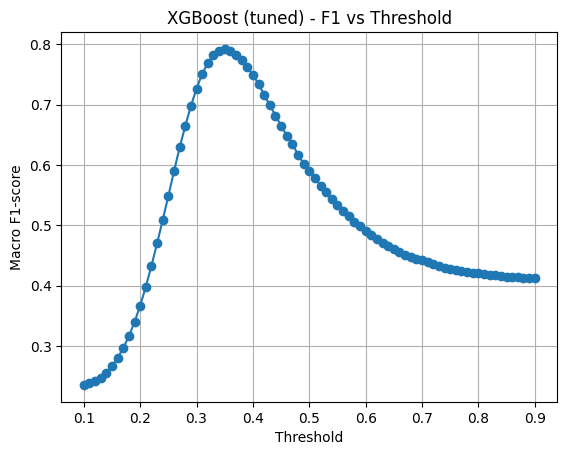

[LightGBM] [Info] Number of positive: 16609, number of negative: 33793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 50402, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329531 -> initscore=-0.710309
[LightGBM] [Info] Start training from score -0.710309

== LightGBM (tuned) (Train: Real+GAN boundary, Test: Real) ==
Best threshold: 0.33 - Macro F1: 0.6973
              precision    recall  f1-score   support

           0     0.8245    0.7992    0.8117     33793
           1     0.5635    0.6037    0.5829     14509

    accuracy                         0.7405     48302
   macro avg     0.6940    0.7015    0.6973     48302
weighted avg     0.7461    0.7405    0.7430     48302

Confusion matrix:
 [[27009  6784]
 [ 5750  8759]]
Accuracy: 0.74050763943522


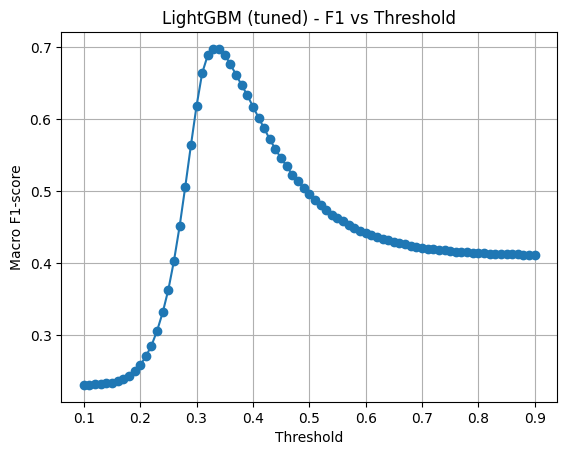

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# ==== 1. Đọc dữ liệu ====
df_real = pd.read_csv(r'D:\dow\project\data\processed_iot_dataset.csv')
df_gan  = pd.read_csv(r'D:\dow\project\data\ctgan_synthetic_balanced_final.csv')

# ==== 2. Chọn cột feature ====
drop_cols = ['Sensor_ID', 'Fault_Status', 'Fault_Type', 'Year', 'Month', 'Day', 'Hour', 'Minute']
feature_cols = [c for c in df_real.columns if c not in drop_cols]

# ==== 3. Huấn luyện sơ bộ XGB để lọc dữ liệu GAN boundary ====
base_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
base_xgb.fit(df_real[feature_cols], df_real['Fault_Status'])

# ==== 4. Dự đoán xác suất và lọc dữ liệu GAN gần ranh giới ====
prob_gan = base_xgb.predict_proba(df_gan[feature_cols])[:, 1]
threshold = 0.1  # vùng gần 0.5
df_gan_boundary = df_gan[(prob_gan >= 0.5 - threshold) & (prob_gan <= 0.5 + threshold)]
print(f'Số mẫu GAN vùng boundary: {len(df_gan_boundary)}')

# ==== 5. Kết hợp dữ liệu thật và GAN boundary ====
df_train = pd.concat([df_real, df_gan_boundary], ignore_index=True)
X_train, y_train = df_train[feature_cols], df_train['Fault_Status']
X_test, y_test   = df_real[feature_cols], df_real['Fault_Status']

# ==== 6. Tuning XGBoost ====
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost params:", xgb_grid.best_params_)

# ==== 7. Tuning LightGBM ====
lgbm_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
lgbm_grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=lgbm_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
lgbm_grid.fit(X_train, y_train)
print("Best LightGBM params:", lgbm_grid.best_params_)

# ==== 8. Hàm đánh giá mô hình ====
import os
import joblib

def eval_model(name, model, X_train, y_train, X_test, y_test, save_prefix):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    best_thresh, best_f1 = 0.5, 0
    for thresh in np.arange(0.1, 0.91, 0.01):
        y_pred = (y_prob >= thresh).astype(int)
        f1 = f1_score(y_test, y_pred, average='macro')
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh

    y_pred_final = (y_prob >= best_thresh).astype(int)
    print(f"\n== {name} (Train: Real+GAN boundary, Test: Real) ==")
    print(f"Best threshold: {best_thresh:.2f} - Macro F1: {best_f1:.4f}")
    print(classification_report(y_test, y_pred_final, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_final))
    print("Accuracy:", accuracy_score(y_test, y_pred_final))

    # Xuất báo cáo classification ra file .csv
    report = classification_report(y_test, y_pred_final, digits=4, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    report_csv_path = f"D:/dow/project/evaluation/pipline/{save_prefix}_report.csv"
    df_report.to_csv(report_csv_path, index=True)
    print(f"=> Đã lưu classification report vào: {report_csv_path}")

    # Lưu confusion matrix
    cm = confusion_matrix(y_test, y_pred_final)
    cm_df = pd.DataFrame(cm)
    cm_csv_path = f"D:/dow/project/evaluation/pipline/{save_prefix}_cm.csv"
    cm_df.to_csv(cm_csv_path, index=False)
    print(f"=> Đã lưu confusion matrix vào: {cm_csv_path}")

    # Lưu model
    model_pkl_path = f"D:/dow/project/evaluation/pipline/{save_prefix}_model.pkl"
    joblib.dump(model, model_pkl_path)
    print(f"=> Đã lưu model vào: {model_pkl_path}")

    # Biểu đồ Macro F1 theo threshold
    thresholds = np.arange(0.1, 0.91, 0.01)
    macro_f1_scores = [f1_score(y_test, (y_prob >= t).astype(int), average='macro') for t in thresholds]
    plt.plot(thresholds, macro_f1_scores, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Macro F1-score')
    plt.title(f'{name} - F1 vs Threshold')
    plt.grid(True)
    plt.show()

# ==== 9. Đánh giá, lưu kết quả & model ====
eval_model("XGBoost (tuned)", xgb_grid.best_estimator_, X_train, y_train, X_test, y_test, save_prefix="xgb_final")
eval_model("LightGBM (tuned)", lgbm_grid.best_estimator_, X_train, y_train, X_test, y_test, save_prefix="lgbm_final")
